# Практика в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

<Axes: xlabel='timestamp'>

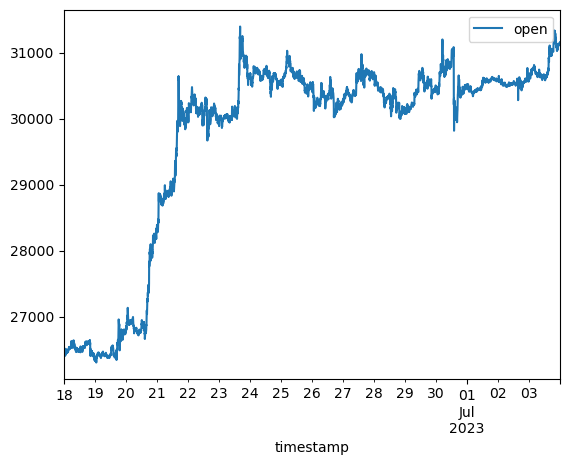

In [2]:
data = data[['open']]

data.plot()

Проделаем следующие шаги:

* Разобьем данные на тренировочную и тестовую часть. В тесте будет 15% данных

* Извлечем лаговые признаки

Будем использовать функцию preprocess_data.

In [7]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
    
    for i in range(lag_start, lag_end + 1):
        data[f'lag_{i}'] = data['open'].shift(i)

    data.dropna(inplace=True)

    train = data[:int((data.shape[0]) * (1 - test_size))]
    test = data[int((data.shape[0]) * (1 - test_size)):]

    X_train = train.drop('open', axis=1)
    y_train = train['open']

    X_test = test.drop('open', axis=1)
    y_test = test['open']

    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_data(data)

Обучим линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислим ошибку MAPE на тестовых данных.

Text(0.5, 1.0, 'Linear ragression\n Mean absolute percentage error: 0.098739964756315%')

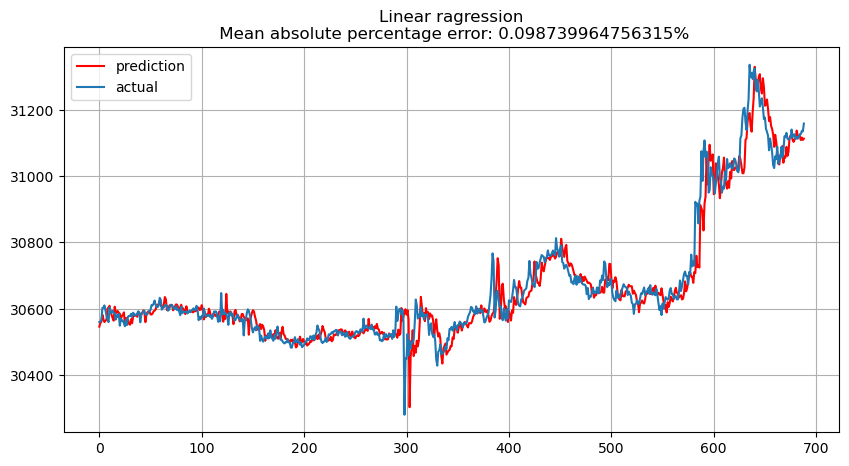

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, 'r', label='prediction')
plt.plot(y_test.values, label='actual')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Linear ragression\n Mean absolute percentage error: {mean_absolute_percentage_error(preds, y_test) * 100}%')